# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "./dataset/train.p"
validation_file= "./dataset/valid.p"
testing_file = "./dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# numpy, pandas for data wrangling
import numpy as np
import pandas as pd

# To suppress incessant warning regarding future api change
import warnings
warnings.filterwarnings('ignore') 

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Number of examples in all dataset
total_n = n_train + n_validation + n_test

# Shape of an image
image_shape = X_train[0].shape

# The number of unique classes/labels in the dataset by using len, set and intersection
n_classes = len(set(y_train).intersection(y_valid).intersection(y_test))

print("Total number of examples =", total_n)
print("Number of training examples =", n_train, ", {}%".format(round(n_train/total_n*100)))
print("Number of validation examples =", n_validation, ", {}%".format(round(n_validation/total_n*100)))
print("Number of testing examples =", n_test, ", {}%".format(round(n_test/total_n*100)))
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Total number of examples = 51839
Number of training examples = 34799 , 67%
Number of validation examples = 4410 , 9%
Number of testing examples = 12630 , 24%
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
# Create DataFrame - the number of instance per class in each train, validation and test set
df = pd.DataFrame()
for labelset, setname in zip([y_train, y_valid, y_test],["train","valid","test"]):
    lbl, counts = np.unique(labelset, return_counts=True)
    temp_df = pd.DataFrame(np.column_stack((lbl,counts)), columns=['label','count'])
    temp_df['set'] = setname
    df = df.append(temp_df).reset_index(drop=True)

In [4]:
# a glimpse of the dataframe
df.head()

,label,count,set
0,0,180,train
1,1,1980,train
2,2,2010,train
3,3,1260,train
4,4,1770,train


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [7]:
?plt.xticks

<Container object of 43 artists>

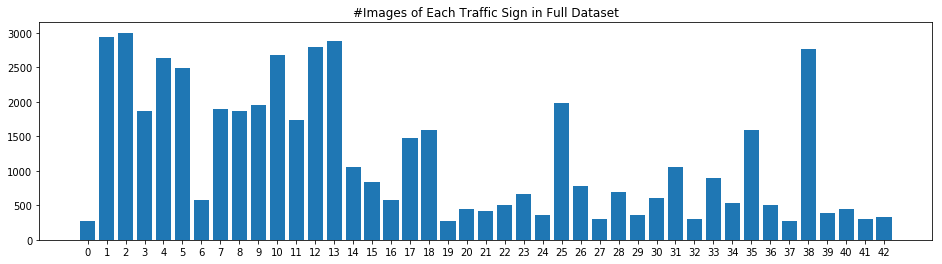

In [20]:
# Number of Images of Each Traffic Sign in train + valid + test
lbl, counts = np.unique( np.concatenate([y_train, y_valid, y_test]), return_counts=True)
plt.figure(figsize=(16,4))
plt.xticks(range(43))
plt.title("#Images of Each Traffic Sign in Full Dataset")
plt.bar(lbl,counts)

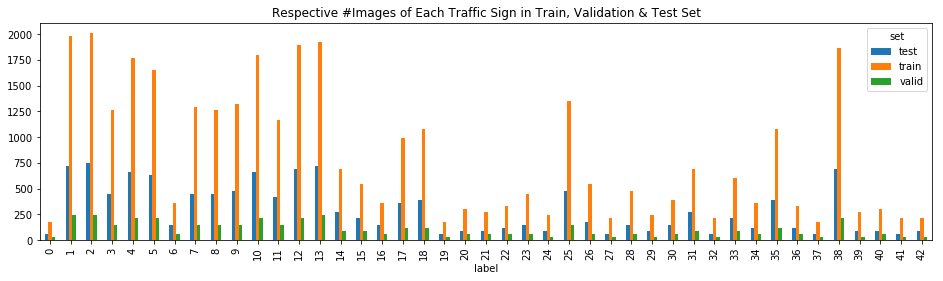

In [21]:
# Number of Images of Each Traffic Sign in train + valid + test
df.pivot('label','set')['count'].plot(kind='bar', stacked=False, figsize=(16,4),
                                        title="Respective #Images of Each Traffic Sign in Train, Validation & Test Set")

In [26]:
# Helper function to randomly pick and plot images from provided dataset
def rand_img_visualizer(image_dataset,image_labelset, rows=2, cols=10, cmap=None):  
    # plotter object for all axes, assuming size 1.5 by 1.5 per images     
    fig, ax = plt.subplots(rows, cols, figsize=(cols*1.5, rows*2))

    #random select rows*cols image index
    imgids = np.random.randint(0, len(image_dataset), rows*cols)
    
    for i, imgid in enumerate(imgids):
        r = int(i/cols)
        c = i%cols
        ax[r,c].imshow(image_dataset[imgid].squeeze(),cmap=cmap)
        ax[r,c].axis('off')
        ax[r,c].set_title("Id:" + str(imgid) + "\nClass: " + str(image_labelset[imgid]))

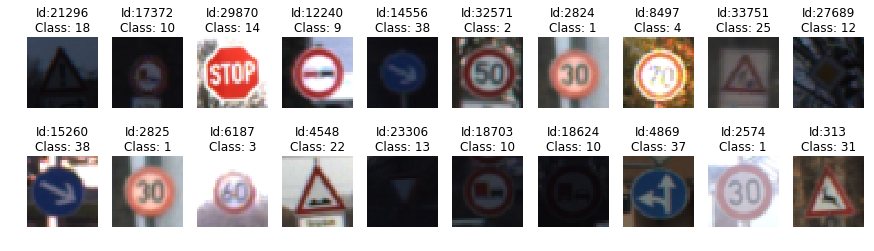

In [27]:
# random visualization from train set
rand_img_visualizer(X_train,y_train)

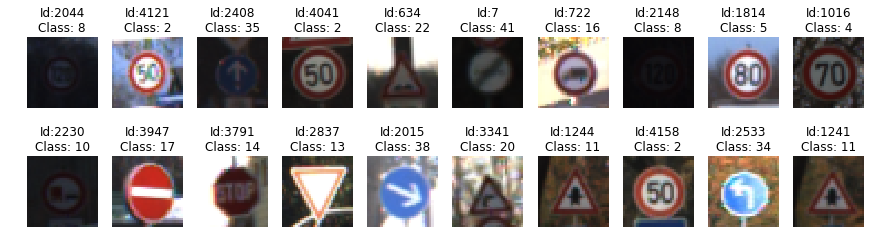

In [28]:
# random visualization from validation set
rand_img_visualizer(X_valid,y_valid)

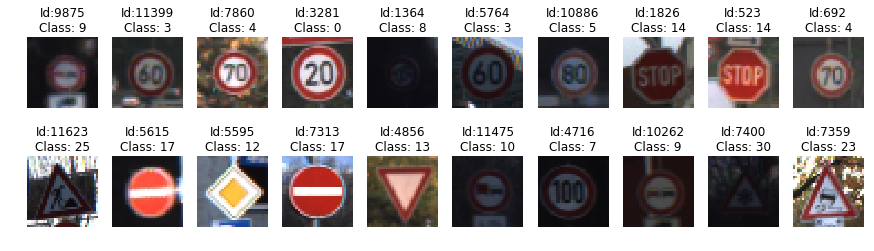

In [29]:
# random visualization from test set
rand_img_visualizer(X_test,y_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

###### Normalization Helper

In [30]:
# Normalization helper
def normalize(dataset):
    #zero-center normalization
    dataset = (dataset.astype('float')-128)/128
    return dataset

###### Grayscaling Helper

In [31]:
# Grayscaling helper
from skimage.color import rgb2gray

def grayscale(dataset):
    dataset = rgb2gray(dataset.astype('float'))
    
    # reshape to single channel from 3 channel
    return np.reshape(dataset, list(dataset.shape) + [1])

######  Pre-process: Grayscaling + Normalization

In [32]:
# Preprocessing - grayscaling followed by normalization
X_train = normalize(grayscale(X_train))
X_valid = normalize(grayscale(X_valid))
X_test = normalize(grayscale(X_test))

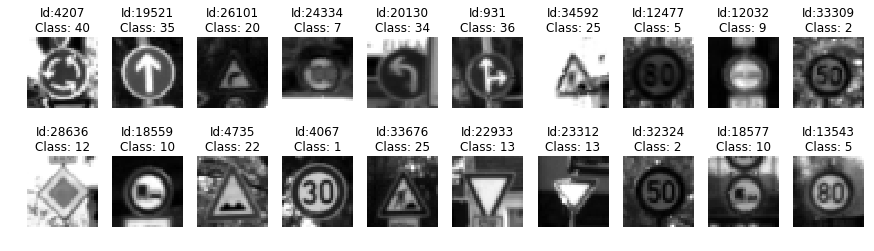

In [33]:
# Visual inspection on train set if preprocessing performed as expected
rand_img_visualizer(X_train, y_train, cmap="gray")

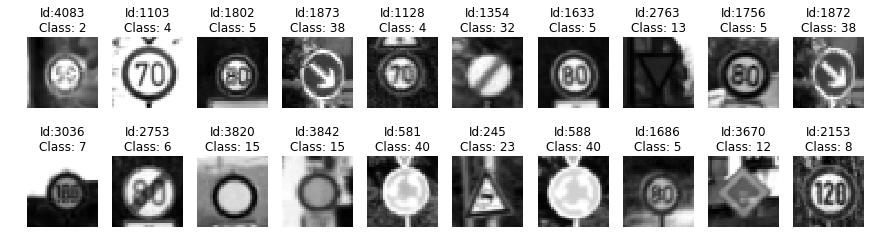

In [34]:
# Visual inspection on validation set if preprocessing performed as expected
rand_img_visualizer(X_valid, y_valid, cmap="gray")

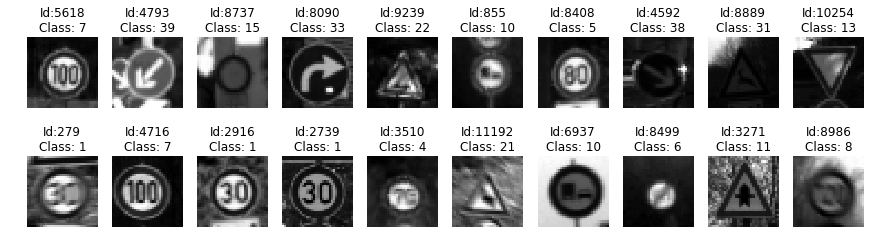

In [35]:
# Visual inspection on test set if preprocessing performed as expected
rand_img_visualizer(X_test, y_test, cmap="gray")

### Data Augmentation

#### Rotation Set

In [36]:
from skimage import transform #scikit-image for transformation API
from tqdm import tqdm # progress bar

In [37]:
# Initialize rotation training set by copying from default training set
X_train_rot = np.copy(X_train)
y_train_rot = np.copy(y_train)

In [38]:
# Rotation Transformation
# random sampling of angle to rotate between -15 to 15
angle = np.random.randint(-15,15, X_train_rot.shape[0]) 

for i in tqdm(range(X_train_rot.shape[0])):
    X_train_rot[i] = transform.rotate(image = X_train_rot[i].squeeze(), 
                                      angle = angle[i], 
                                      mode  = 'reflect').reshape(X_train_rot[i].shape)

100%|██████████| 34799/34799 [00:07<00:00, 4485.03it/s]


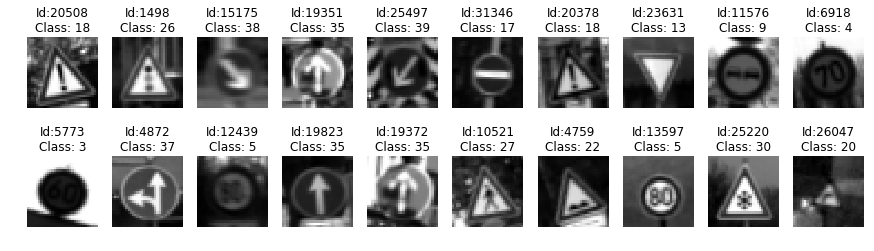

In [63]:
# Randomly plot Rotated images
rand_img_visualizer(X_train_rot, y_train_rot, cmap="gray")

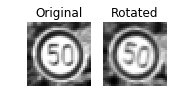

In [79]:
# Visual inspection on rotation set
fig = plt.figure(figsize=(2.5,2.5))

b=fig.add_subplot(1,2,1)
b.set_title("Original")
b.axis('off')
plt.imshow(X_train[32874].squeeze(), cmap='gray')

a=fig.add_subplot(1,2,2)
a.set_title("Rotated")
a.axis('off')
plt.imshow(X_train_rot[32874].squeeze(), cmap='gray')

#### Zoom Set

In [54]:
# Zoom operation helper function
def zoom(img, scale=1.0):
    if scale == 1.0:
        return img
    
    elif scale < 1: # Zoom out
        new_w = int(img.shape[0] * scale)
        new_h = int(img.shape[1] * scale)
        pad_x = abs(img.shape[0] - new_w)
        pad_y = abs(img.shape[1] - new_h)
        pad_x1 = int(pad_x/2)
        pad_x2 = abs(pad_x - pad_x1)
        pad_y1 = int(pad_y/2)
        pad_y2 = abs(pad_y - pad_y1)
        return transform.resize(np.pad(img, ((pad_x1,pad_x2),(pad_y1,pad_y2),(0,0)),mode='reflect'), img.shape)
    
    elif scale > 1: # Zoom in
        new_w = int(img.shape[0] * scale)
        new_h = int(img.shape[1] * scale)
        offset_x = abs(new_w - img.shape[0])
        offset_y = abs(new_h - img.shape[1])
        x1 = int(offset_x/2)
        x2 = new_w - offset_x + x1
        y1 = int(offset_y/2)
        y2 = new_h - offset_y + y1
        return transform.resize(img, (new_w,new_h,img.shape[2]))[x1:x2,y1:y2,:]

In [55]:
# Initialize zoom training set by copying from default training set
X_train_zoom = np.copy(X_train)
y_train_zoom = np.copy(y_train)

In [56]:
# Zoom Transformation
# random sampling of scale to zoom between 0.9 to 1.1
scale = np.random.uniform(0.9, 1.0, X_train_zoom.shape[0])

for i in tqdm(range(X_train_zoom.shape[0])):
    X_train_zoom[i] = zoom(X_train_zoom[i], scale[i])

100%|██████████| 34799/34799 [00:34<00:00, 1009.64it/s]


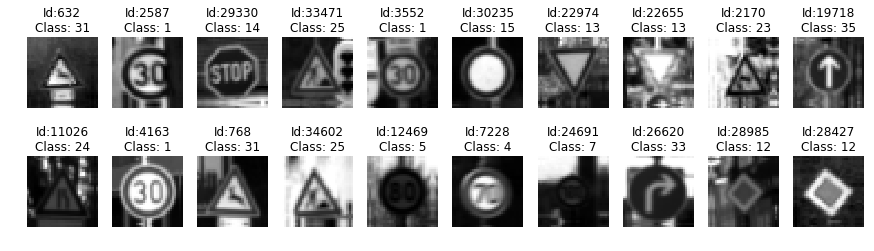

In [82]:
# Randomly plot Zoomed images
rand_img_visualizer(X_train_zoom, y_train_zoom, cmap="gray")

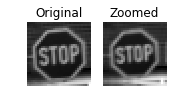

In [83]:
# Visual inspection on Zoom set
fig = plt.figure(figsize=(2.5,2.5))

b=fig.add_subplot(1,2,1)
b.set_title("Original")
b.axis('off')
plt.imshow(X_train[29330].squeeze(), cmap='gray')

a=fig.add_subplot(1,2,2)
a.set_title("Zoomed")
a.axis('off')
plt.imshow(X_train_zoom[29330].squeeze(), cmap='gray')

#### Translation Set

In [84]:
# Initialize translation training set by copying from default training set
X_train_translate = np.copy(X_train)
y_train_translate = np.copy(y_train)

In [85]:
# random sampling of translation vector between -2 to 2 pixel
translation = list(zip(np.random.randint(-2,2, X_train_translate.shape[0]),
                       np.random.randint(-2,2,X_train_translate.shape[0])))

for i in tqdm(range(X_train_translate.shape[0])):
    X_train_translate[i] = transform.warp(X_train_translate[i], transform.AffineTransform(translation=translation[i]))

100%|██████████| 34799/34799 [00:04<00:00, 7205.91it/s]


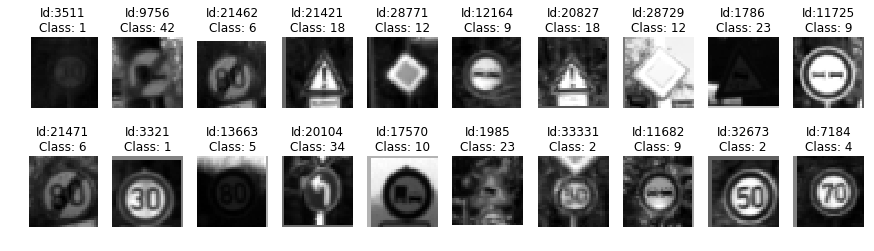

In [86]:
# Randomly plot translated images
rand_img_visualizer(X_train_translate, y_train_translate, cmap="gray")

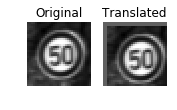

In [91]:
# Visual inspection on Translation set
fig = plt.figure(figsize=(2.5,2.5))

b=fig.add_subplot(1,2,1)
b.set_title("Original")
b.axis('off')
plt.imshow(X_train[32673].squeeze(), cmap='gray')

a=fig.add_subplot(1,2,2)
a.set_title("Translated")
a.axis('off')
plt.imshow(X_train_translate[32673].squeeze(), cmap='gray')

In [92]:
# Check all augmented data in expected dimension
print(X_train.shape, X_train_rot.shape, X_train_zoom.shape, X_train_translate.shape)

(34799, 32, 32, 1) (34799, 32, 32, 1) (34799, 32, 32, 1) (34799, 32, 32, 1)


###### Augmented Dataset Consolidation

In [93]:
# Consolidate all newly-created dataset
if 'data_augmentation_done' not in globals():
    X_train_Aug = np.concatenate([X_train,X_train_rot,X_train_translate,X_train_zoom])
    y_train_Aug = np.concatenate([y_train,y_train_rot,y_train_translate,y_train_zoom])
    
    # to avoid re-entering this loop to avoid multiple concatenation operation
    data_augmentation_done = True
    
print("Shape of train example set:", X_train_Aug.shape, "\nShape of train label set:", y_train_Aug.shape)

Shape of train example set: (139196, 32, 32, 1) 
Shape of train label set: (139196,)


### Model Architecture

In [35]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [36]:
# import tensorflow and relevant functions.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [37]:
# set Epoch & Batch Size
EPOCHS = 10
BATCH_SIZE = 128

In [38]:
# set grayscale as input
color_channel=1

In [39]:
# features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, color_channel))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

###### Model Architecture Helper Function

In [40]:
# Configurable Model Architecture

def LeNet(x, color_channel=1, conv1_depth=6, conv2_depth=16, multiscale=False, dropout_keep_prob=None):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights for each layer
    mu = 0
    sigma = 0.1
    
    # ---------
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x conv1_depth.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, color_channel, conv1_depth), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(conv1_depth))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Layer 1: Activation.
    conv1_relu = tf.nn.relu(conv1)

    # Layer 1: Pooling. Input = 28x28x conv1_depth. Output = 14x14x conv1_depth.
    conv1_pool = tf.nn.max_pool(conv1_relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # ---------
    # Layer 2: Convolutional. Input = 14x14x conv1_depth, Output = 10x10x conv2_depth.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, conv1_depth, conv2_depth), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(conv2_depth))
    conv2   = tf.nn.conv2d(conv1_pool, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Layer 2: Activation.
    conv2_relu = tf.nn.relu(conv2)

    # Layer 2: Pooling. Input = 10x10x conv2_depth. Output = 5x5x conv2_depth.
    conv2_pool = tf.nn.max_pool(conv2_relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # ---------
    # Layer 3: Fully Connected.
    # Flattened input, if multiscaled enabled, input = 14*14* conv1_depth + 5*5* conv2_depth. 
    # Else, input = 5*5* conv2_depth
    # Output = 120.
    pool1_shape = conv1_pool.get_shape().as_list()
    pool1_flatten = tf.reshape(conv1_pool,[-1, pool1_shape[1] * pool1_shape[2] * pool1_shape[3]])
    
    pool2_shape = conv2_pool.get_shape().as_list()
    pool2_flatten = tf.reshape(conv2_pool,[-1, pool2_shape[1] * pool2_shape[2] * pool2_shape[3]])
    
    if multiscale is True:
        fc_input = tf.concat(1, [pool1_flatten, pool2_flatten])
        fc_input_len = 14*14*conv1_depth + 5*5*conv2_depth
    else:
        fc_input = pool2_flatten
        fc_input_len = 5*5*conv2_depth
    
    # Dropout can be turned on in this layer
    if dropout_keep_prob is not None:
        if (dropout_keep_prob >= 0.0) & (dropout_keep_prob <= 1.0):
            fc_input = tf.nn.dropout(fc_input, keep_prob=dropout_keep_prob)
    
    # Layer 3: Fully Connected. Input = as explained above. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc_input_len, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc_input, fc1_W) + fc1_b
        
    # Layer 3: Activation.
    fc1_relu    = tf.nn.relu(fc1)

    # ---------
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1_relu, fc2_W) + fc2_b
    
    # Layer 4: Activation.
    fc2_relu    = tf.nn.relu(fc2)

    # ---------
    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2_relu, fc3_W) + fc3_b
    
    return logits, conv1, conv2

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [41]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [42]:
# Set Learning Rate
rate = 0.001

# Model Definition
logits, conv1, conv2 = LeNet(x, color_channel=1, conv1_depth=12, conv2_depth=32, multiscale=True, dropout_keep_prob=0.95)

# Cost Function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

# Minimization/Training Operation
training_operation = optimizer.minimize(loss_operation)

In [43]:
# Helper to evaluate accuracy on test set
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [46]:
# Helper to launch training

from sklearn.utils import shuffle
import time

def launch_training(X_train=X_train,y_train=y_train, model_id=0):
    train_begin = time.perf_counter()

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        result = pd.DataFrame(columns=['Model_Id','Epoch',"Valid_Acc","Loss"])
        
        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                _, loss = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y})

            validation_accuracy = evaluate(X_valid, y_valid)
            print("Model_id {}".format(model_id),", EPOCH {} ...".format(i+1),
                  ", Validation Accuracy = {:.3f}".format(validation_accuracy), 
                  ", Loss = {:.5f}".format(loss))
            result.loc[i] = [model_id,i,validation_accuracy,loss]
            
        saver.save(sess, './lenet_model_' + str(model_id))
        result.to_csv('./lenet_model_' + str(model_id) + '_log.csv', index=False)
        print("Model and Log saved.")

    train_elapsed = time.perf_counter() - train_begin
    print('Elapsed %.3f seconds.' % train_elapsed)

In [47]:
# Helper to launch test accuracy evaluation

def launch_testing(X_test=X_test,y_test=y_test, model_id=0):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

        test_accuracy = evaluate(X_test, y_test)
        print("Model_id {}".format(model_id),", Test Accuracy = {:.3f}".format(test_accuracy))

### Model 0: Default Lenet5

In [48]:
EPOCHS = 50
ID = 0
logits, conv1, conv2 = LeNet(x)
launch_training(model_id=ID)
launch_testing(model_id=ID)

Training...

Model_id 0 , EPOCH 1 ... , Validation Accuracy = 0.820 , Loss = 0.52839
Model_id 0 , EPOCH 2 ... , Validation Accuracy = 0.866 , Loss = 0.13283
Model_id 0 , EPOCH 3 ... , Validation Accuracy = 0.892 , Loss = 0.36193
Model_id 0 , EPOCH 4 ... , Validation Accuracy = 0.900 , Loss = 0.14894
Model_id 0 , EPOCH 5 ... , Validation Accuracy = 0.904 , Loss = 0.02801
Model_id 0 , EPOCH 6 ... , Validation Accuracy = 0.905 , Loss = 0.01423
Model_id 0 , EPOCH 7 ... , Validation Accuracy = 0.910 , Loss = 0.03116
Model_id 0 , EPOCH 8 ... , Validation Accuracy = 0.908 , Loss = 0.01042
Model_id 0 , EPOCH 9 ... , Validation Accuracy = 0.907 , Loss = 0.02171
Model_id 0 , EPOCH 10 ... , Validation Accuracy = 0.929 , Loss = 0.02213
Model_id 0 , EPOCH 11 ... , Validation Accuracy = 0.907 , Loss = 0.02120
Model_id 0 , EPOCH 12 ... , Validation Accuracy = 0.927 , Loss = 0.00989
Model_id 0 , EPOCH 13 ... , Validation Accuracy = 0.911 , Loss = 0.00837
Model_id 0 , EPOCH 14 ... , Validation Accuracy

### Model 1: Lenet5, Deeper Conv2d

In [49]:
EPOCHS = 50
ID = 1
logits, conv1, conv2 = LeNet(x, conv1_depth=12, conv2_depth=32)
launch_training(model_id=ID)
launch_testing(model_id=ID)

Training...

Model_id 1 , EPOCH 1 ... , Validation Accuracy = 0.770 , Loss = 0.55340
Model_id 1 , EPOCH 2 ... , Validation Accuracy = 0.860 , Loss = 0.23265
Model_id 1 , EPOCH 3 ... , Validation Accuracy = 0.884 , Loss = 0.10419
Model_id 1 , EPOCH 4 ... , Validation Accuracy = 0.891 , Loss = 0.13450
Model_id 1 , EPOCH 5 ... , Validation Accuracy = 0.886 , Loss = 0.09603
Model_id 1 , EPOCH 6 ... , Validation Accuracy = 0.897 , Loss = 0.02050
Model_id 1 , EPOCH 7 ... , Validation Accuracy = 0.898 , Loss = 0.02579
Model_id 1 , EPOCH 8 ... , Validation Accuracy = 0.907 , Loss = 0.01809
Model_id 1 , EPOCH 9 ... , Validation Accuracy = 0.917 , Loss = 0.02687
Model_id 1 , EPOCH 10 ... , Validation Accuracy = 0.910 , Loss = 0.09996
Model_id 1 , EPOCH 11 ... , Validation Accuracy = 0.888 , Loss = 0.02229
Model_id 1 , EPOCH 12 ... , Validation Accuracy = 0.913 , Loss = 0.01769
Model_id 1 , EPOCH 13 ... , Validation Accuracy = 0.917 , Loss = 0.02121
Model_id 1 , EPOCH 14 ... , Validation Accuracy

### Model 2: Lenet5, Deeper Conv2d with Augmented Data

In [50]:
EPOCHS = 50
ID = 2 
logits, conv1, conv2 = LeNet(x, conv1_depth=12, conv2_depth=32)
launch_training(X_train=X_train_Aug,y_train=y_train_Aug, model_id=ID)
launch_testing(model_id=ID)

Training...

Model_id 2 , EPOCH 1 ... , Validation Accuracy = 0.900 , Loss = 0.11602
Model_id 2 , EPOCH 2 ... , Validation Accuracy = 0.922 , Loss = 0.20370
Model_id 2 , EPOCH 3 ... , Validation Accuracy = 0.927 , Loss = 0.17404
Model_id 2 , EPOCH 4 ... , Validation Accuracy = 0.932 , Loss = 0.06013
Model_id 2 , EPOCH 5 ... , Validation Accuracy = 0.939 , Loss = 0.01747
Model_id 2 , EPOCH 6 ... , Validation Accuracy = 0.920 , Loss = 0.03791
Model_id 2 , EPOCH 7 ... , Validation Accuracy = 0.948 , Loss = 0.00216
Model_id 2 , EPOCH 8 ... , Validation Accuracy = 0.948 , Loss = 0.00058
Model_id 2 , EPOCH 9 ... , Validation Accuracy = 0.931 , Loss = 0.00833
Model_id 2 , EPOCH 10 ... , Validation Accuracy = 0.932 , Loss = 0.00005
Model_id 2 , EPOCH 11 ... , Validation Accuracy = 0.953 , Loss = 0.00643
Model_id 2 , EPOCH 12 ... , Validation Accuracy = 0.939 , Loss = 0.01128
Model_id 2 , EPOCH 13 ... , Validation Accuracy = 0.930 , Loss = 0.04421
Model_id 2 , EPOCH 14 ... , Validation Accuracy

### Model 3: Multi-scale Lenet5, with Augmented Data

In [51]:
EPOCHS = 50
ID = 3
logits, conv1, conv2 = LeNet(x, conv1_depth=12, conv2_depth=32, multiscale=True)
launch_training(X_train=X_train_Aug,y_train=y_train_Aug, model_id=ID)
launch_testing(model_id=ID)

Training...

Model_id 3 , EPOCH 1 ... , Validation Accuracy = 0.920 , Loss = 0.14382
Model_id 3 , EPOCH 2 ... , Validation Accuracy = 0.929 , Loss = 0.09490
Model_id 3 , EPOCH 3 ... , Validation Accuracy = 0.929 , Loss = 0.04237
Model_id 3 , EPOCH 4 ... , Validation Accuracy = 0.933 , Loss = 0.03382
Model_id 3 , EPOCH 5 ... , Validation Accuracy = 0.945 , Loss = 0.10533
Model_id 3 , EPOCH 6 ... , Validation Accuracy = 0.939 , Loss = 0.03723
Model_id 3 , EPOCH 7 ... , Validation Accuracy = 0.928 , Loss = 0.00443
Model_id 3 , EPOCH 8 ... , Validation Accuracy = 0.941 , Loss = 0.00773
Model_id 3 , EPOCH 9 ... , Validation Accuracy = 0.948 , Loss = 0.00700
Model_id 3 , EPOCH 10 ... , Validation Accuracy = 0.950 , Loss = 0.02678
Model_id 3 , EPOCH 11 ... , Validation Accuracy = 0.953 , Loss = 0.00243
Model_id 3 , EPOCH 12 ... , Validation Accuracy = 0.963 , Loss = 0.03087
Model_id 3 , EPOCH 13 ... , Validation Accuracy = 0.949 , Loss = 0.00697
Model_id 3 , EPOCH 14 ... , Validation Accuracy

### Model 4: Multi-scale Lenet5, with Augmented Data, Dropout Enabled

In [54]:
EPOCHS = 50
ID = 4
logits, conv1, conv2 = LeNet(x, conv1_depth=12, conv2_depth=32, multiscale=True, dropout_keep_prob=0.95)
launch_training(X_train=X_train_Aug,y_train=y_train_Aug, model_id=ID)
launch_testing(model_id=ID)

Training...

Model_id 4 , EPOCH 1 ... , Validation Accuracy = 0.899 , Loss = 0.26630
Model_id 4 , EPOCH 2 ... , Validation Accuracy = 0.926 , Loss = 0.07922
Model_id 4 , EPOCH 3 ... , Validation Accuracy = 0.928 , Loss = 0.10037
Model_id 4 , EPOCH 4 ... , Validation Accuracy = 0.929 , Loss = 0.05354
Model_id 4 , EPOCH 5 ... , Validation Accuracy = 0.932 , Loss = 0.02471
Model_id 4 , EPOCH 6 ... , Validation Accuracy = 0.947 , Loss = 0.01615
Model_id 4 , EPOCH 7 ... , Validation Accuracy = 0.958 , Loss = 0.02600
Model_id 4 , EPOCH 8 ... , Validation Accuracy = 0.945 , Loss = 0.00024
Model_id 4 , EPOCH 9 ... , Validation Accuracy = 0.953 , Loss = 0.00958
Model_id 4 , EPOCH 10 ... , Validation Accuracy = 0.935 , Loss = 0.00006
Model_id 4 , EPOCH 11 ... , Validation Accuracy = 0.949 , Loss = 0.02353
Model_id 4 , EPOCH 12 ... , Validation Accuracy = 0.959 , Loss = 0.01383
Model_id 4 , EPOCH 13 ... , Validation Accuracy = 0.957 , Loss = 0.00024
Model_id 4 , EPOCH 14 ... , Validation Accuracy

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [93]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob

extra_imgs = [np.array(plt.imread(img)) for img in glob.glob('external_images/*.jpg')]
external_imgs = np.zeros((len(extra_imgs),) + extra_imgs[0].shape, dtype='uint8')

for i, img in enumerate(extra_imgs):
    external_imgs[i,:,:,:] = img

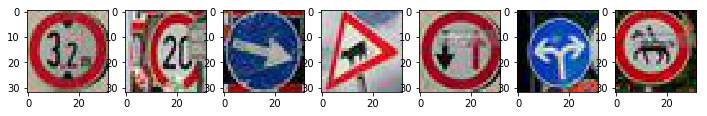

In [94]:
fig, ax = plt.subplots(1, len(external_imgs), figsize=(12, 1.5))
for i, img in enumerate(external_imgs):
    ax[i].imshow(img)

In [95]:
external_imgs = normalize(grayscale(external_imgs))

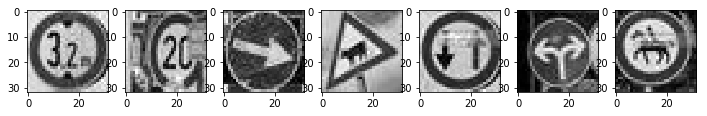

In [96]:
fig, ax = plt.subplots(1, len(external_imgs), figsize=(12, 1.5))
for i, img in enumerate(external_imgs):
    ax[i].imshow(img.squeeze(),cmap='gray')

### Predict the Sign Type for Each Image

In [97]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [101]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = tf.argmax(logits, 1)
    for i in range(0, external_imgs.shape[0]):
        print(prediction.eval(session=sess,feed_dict={x : external_imgs[i].reshape([1, 32,32,1])}))

[1]
[3]
[38]
[25]
[35]
[39]
[40]


### Analyze Performance

In [102]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [103]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [104]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y = tf.nn.softmax(logits)
    for i in range(0, external_imgs.shape[0]):
        y_prob = np.array(y.eval(session=sess,feed_dict={x : external_imgs[i].reshape([1, 32,32,1])}))
        print(i, sess.run(tf.nn.top_k(tf.constant(y_prob), k=3)))

0 TopKV2(values=array([[ 0.62797183,  0.19822502,  0.15331616]], dtype=float32), indices=array([[ 1, 11,  0]], dtype=int32))
1 TopKV2(values=array([[ 0.87536627,  0.11204175,  0.00601279]], dtype=float32), indices=array([[ 3, 11,  2]], dtype=int32))
2 TopKV2(values=array([[ 0.85407251,  0.13476968,  0.00955414]], dtype=float32), indices=array([[38, 34, 36]], dtype=int32))
3 TopKV2(values=array([[ 0.99321884,  0.00239009,  0.00221882]], dtype=float32), indices=array([[25, 30, 34]], dtype=int32))
4 TopKV2(values=array([[  9.97920930e-01,   1.13620004e-03,   6.65868632e-04]], dtype=float32), indices=array([[35, 13, 38]], dtype=int32))
5 TopKV2(values=array([[ 0.58347815,  0.4128997 ,  0.00114575]], dtype=float32), indices=array([[39, 33,  0]], dtype=int32))
6 TopKV2(values=array([[ 0.8538332 ,  0.14254975,  0.00352902]], dtype=float32), indices=array([[40, 39,  2]], dtype=int32))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [47]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,6, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

10425 26


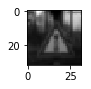

In [48]:
index = np.random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
print(index, y_train[index])

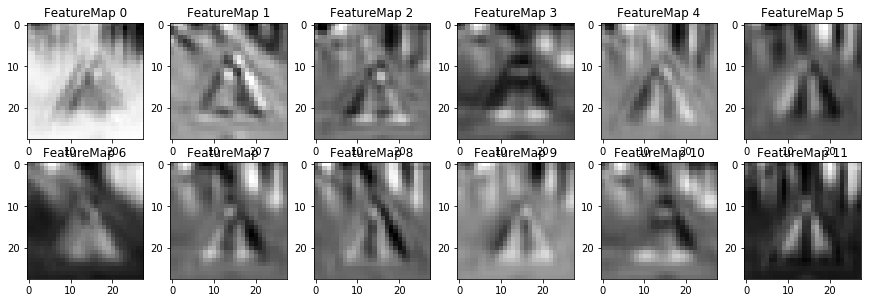

In [63]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
#     sess = tf.get_default_session()
    outputFeatureMap(image.reshape([1, 32,32,1]), conv1_relu)

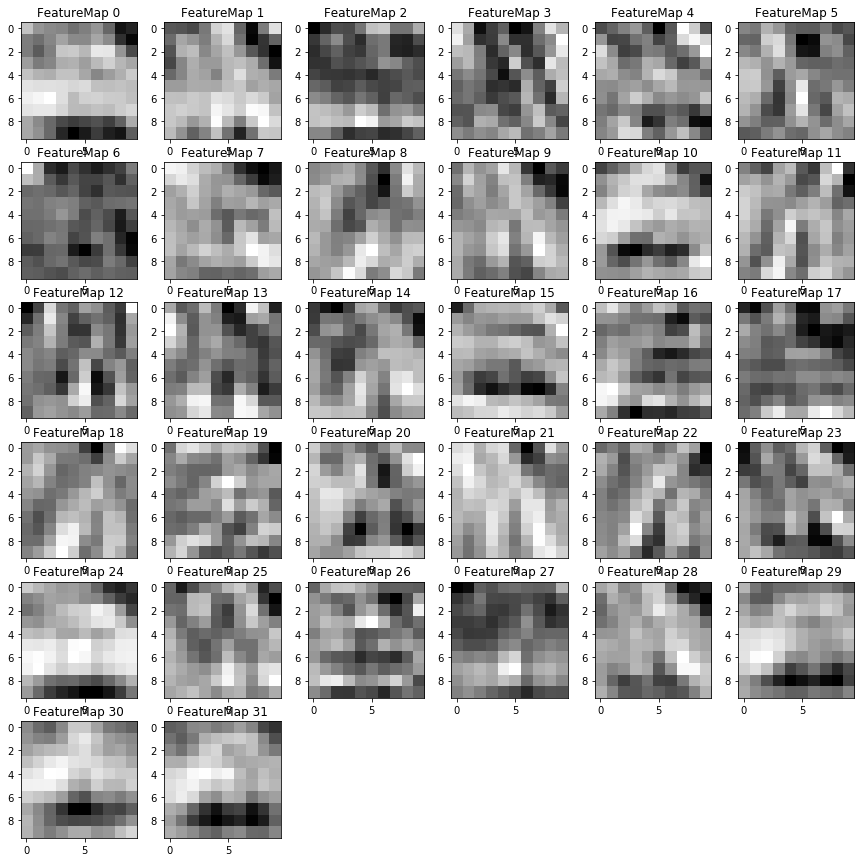

In [62]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
#     sess = tf.get_default_session()
    outputFeatureMap(image.reshape([1, 32,32,1]), conv2_relu)